Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

1. Why this project is important? What problem are you trying to solve?

2. How do you measure the model performance (metrics)? What is the benchmark?

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings 
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### The dataset has 36275 data points.  There are 19 columns, including 5 categorical data and 14 numerical data (including booleans).  There are no missing values.

In [4]:
#number of unique values in each collumn
df.nunique()
#Booking_ID: for identity, no duplicate, will be dropped

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


## 1. Pre-model analysis: EDA & insights

In [5]:
# target:booking_status
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [6]:
df['booking_status'].value_counts(normalize = True)
#canceled: 33%, imbalaced data

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

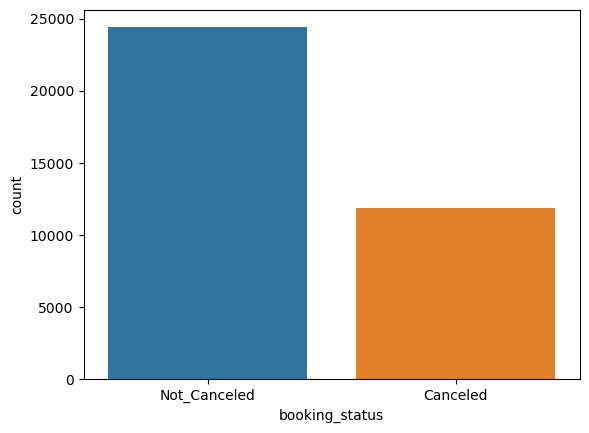

In [7]:
#target plot
sns.countplot(data = df, x = 'booking_status')

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

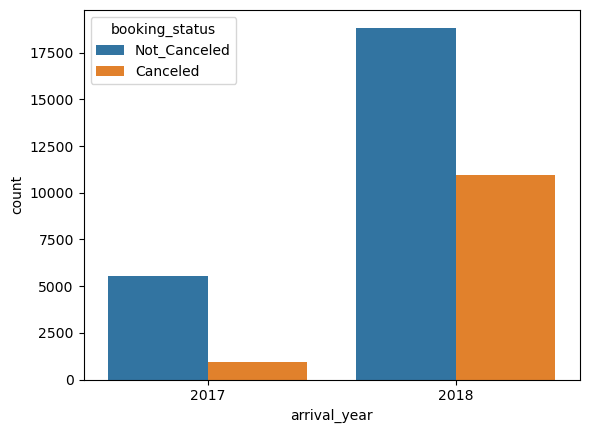

In [8]:
#time series featues: arrival_year
sns.countplot(data = df, x = 'arrival_year', hue = 'booking_status')
#data in 2017 is much less than data in 2018.  So data in the future cannot be predicted based on continous time series data
#feature of arrival_year can be dropped for the modeling

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

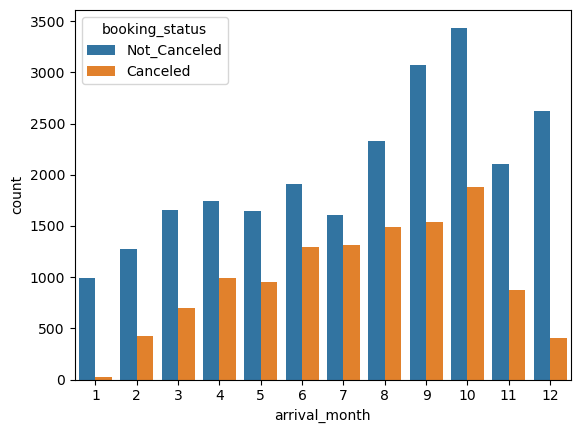

In [9]:
#time series featues: arrival_month
sns.countplot(data = df, x = 'arrival_month', hue = 'booking_status')
#cancellation is high in summer and fall

<AxesSubplot:xlabel='arrival_date', ylabel='count'>

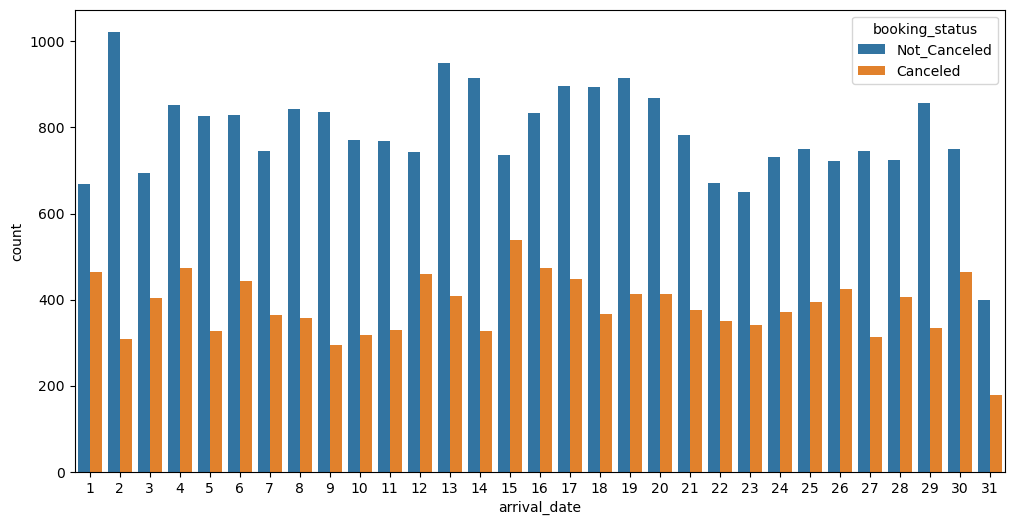

In [10]:
#time series featues: arrival_date

fig = plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'arrival_date', hue = 'booking_status')

In [14]:
#transfer to the continous time series data

temp = df.rename(columns = {'arrival_year': 'year',
                            'arrival_month': 'month',
                            'arrival_date': 'day'})
df['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors = 'coerce')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [15]:
df['date'].min(), df['date'].max()

(Timestamp('2017-07-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [17]:
#create a new feature: season to displace arrival_month and arrival_date
#arrival_month = 3-5: spring; 6-8: summer; 9-11: fall; 12-2: winter

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['season'] = df['arrival_month'].apply(lambda x: season_dict[x])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date,season
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,Fall
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,Fall
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,Winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,Spring
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,Spring


<AxesSubplot:xlabel='season', ylabel='count'>

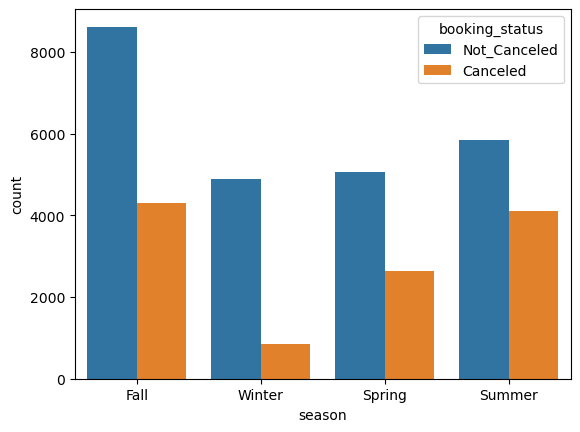

In [18]:
#time series featues: season

sns.countplot(data = df, x = 'season', hue = 'booking_status')

In [30]:
#seperate features to categorical and numerical features

cat = ['type_of_meal_plan', 
       'required_car_parking_space', 
       'room_type_reserved',
       'season',
       'market_segment_type',
       'repeated_guest']

num = ['no_of_adults', 
       'no_of_children', 
       'no_of_weekend_nights', 
       'no_of_week_nights', 
       'lead_time',
       'no_of_previous_cancellations', 
       'no_of_previous_bookings_not_canceled',
       'avg_price_per_room',
       'no_of_special_requests']

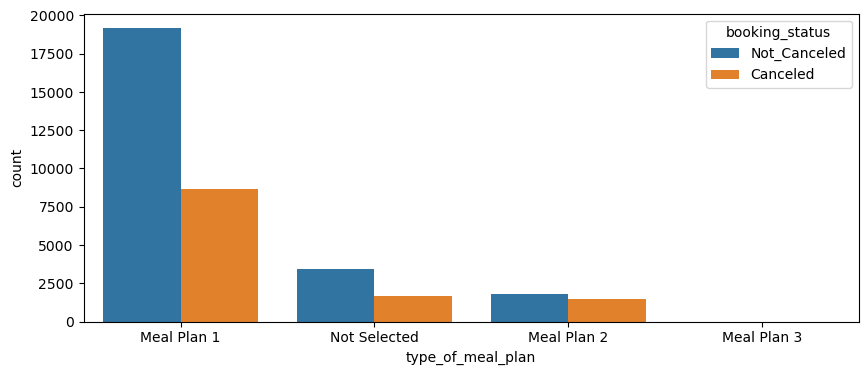

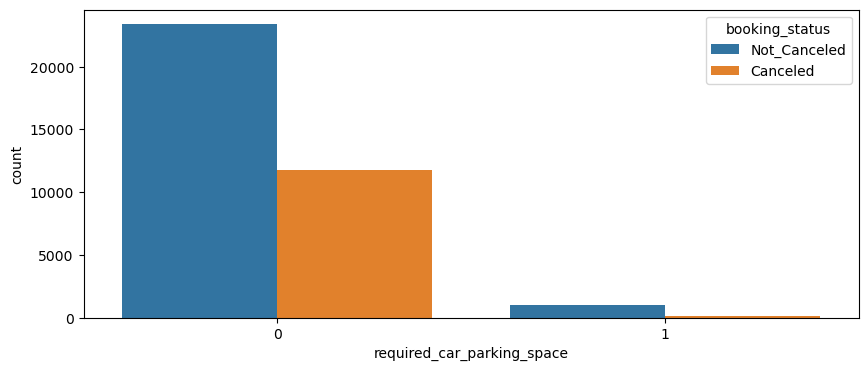

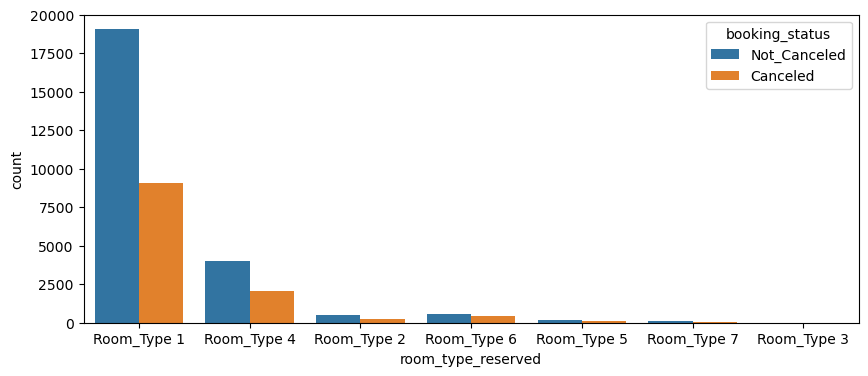

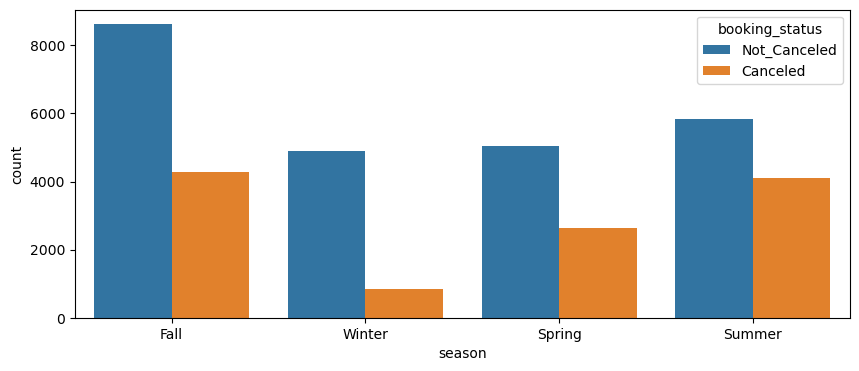

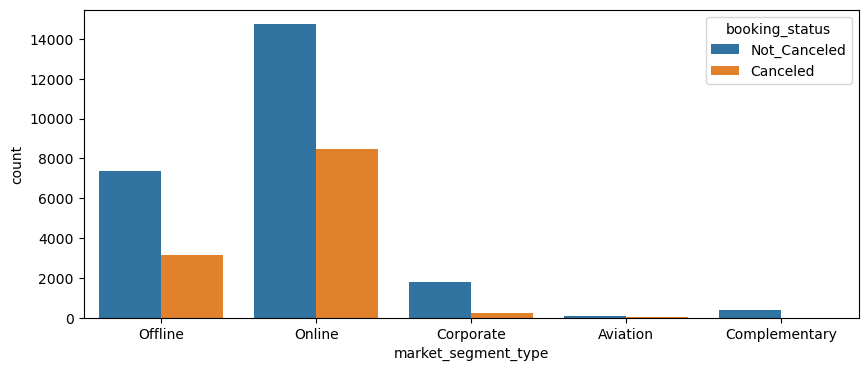

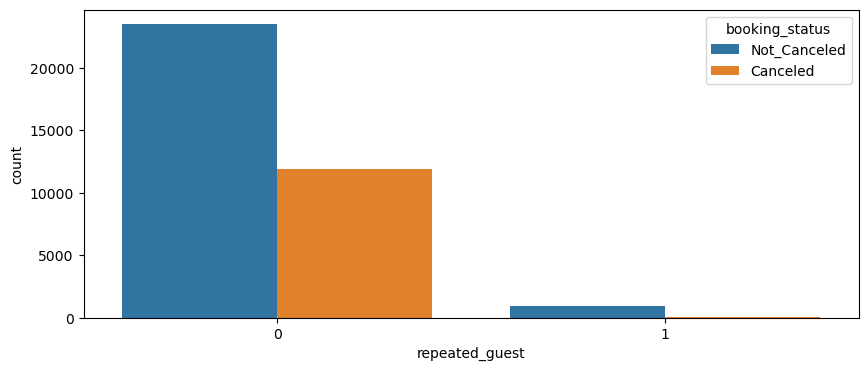

In [28]:
#data vasulization for categorical data

for i in cat:
    fig = plt.figure(figsize = (10, 4))
    sns.countplot(data = df, x = i, hue = 'booking_status')
    plt.show()

#### Top contributors to the categorical features:
#### 'type_of_meal_plan': meal plan 1
#### 'required_car_parking_space': no
#### 'room_type_reserved': room type 1 & 4
#### 'season': summer, fall
#### 'market_segment_type': online, offline
#### 'repeated_guest': no

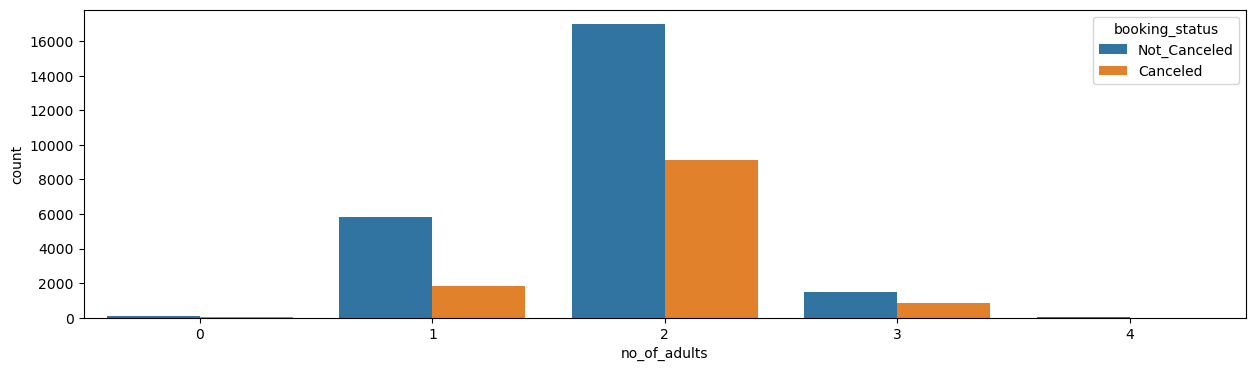

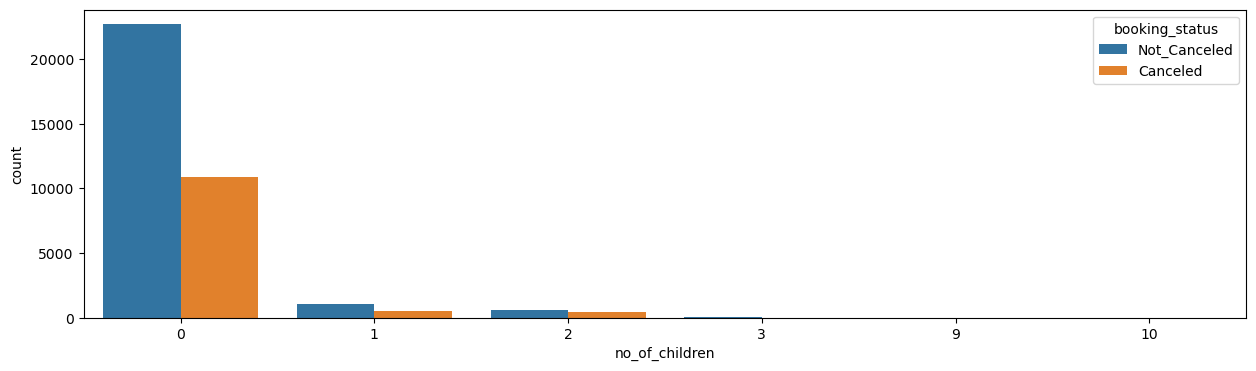

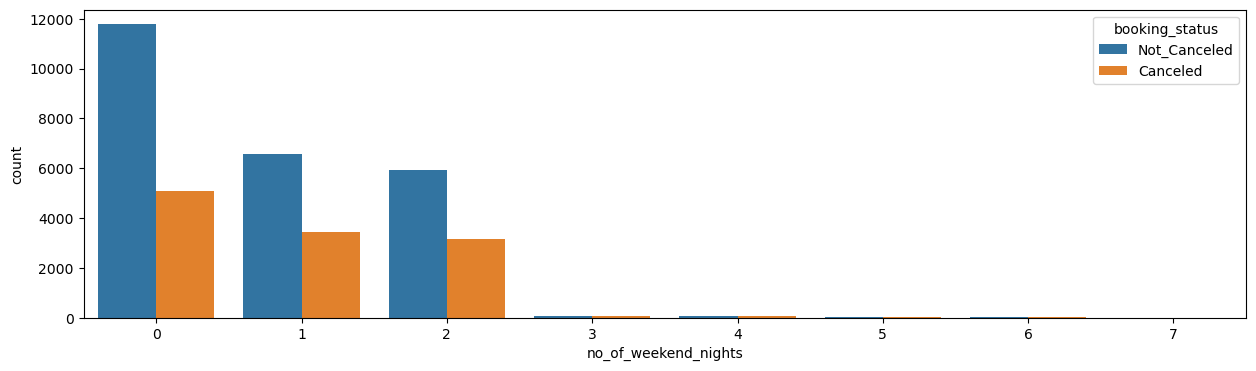

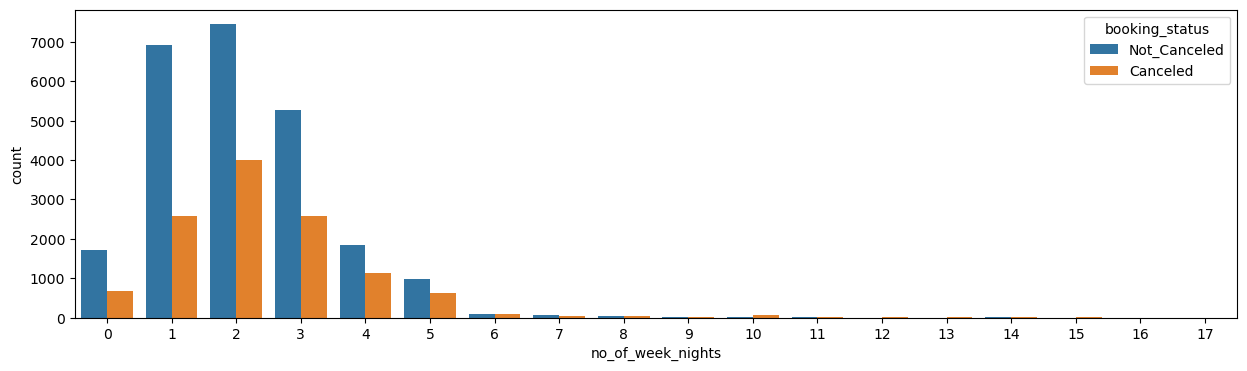

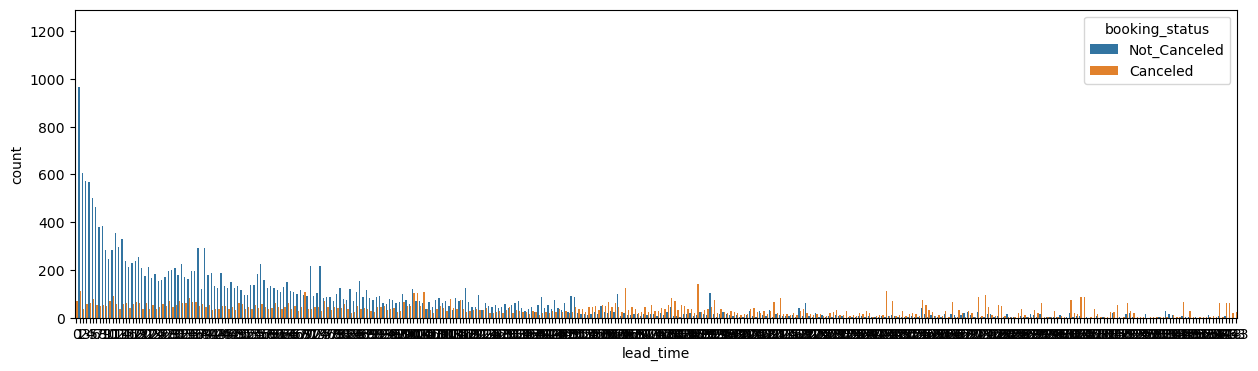

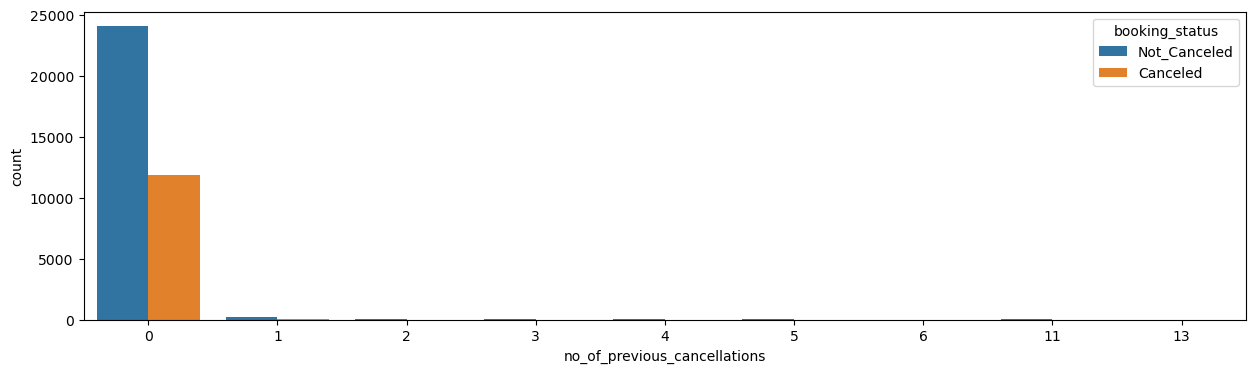

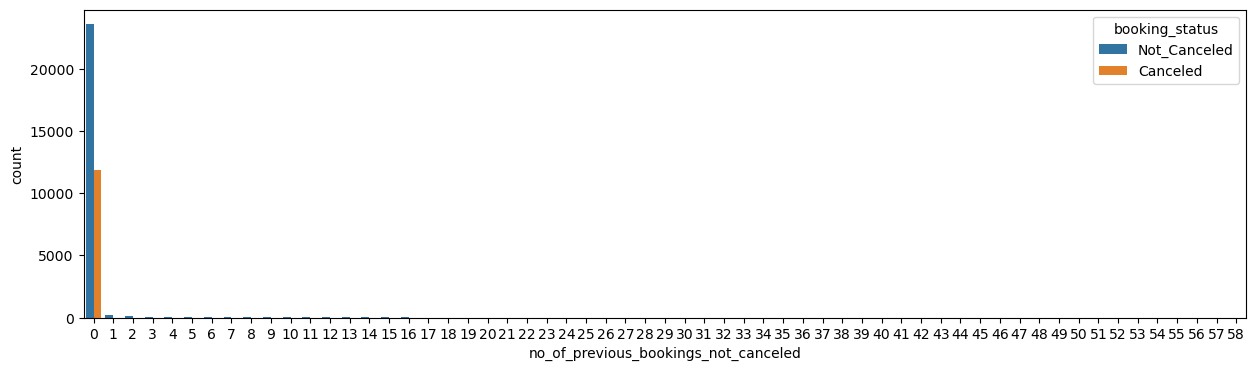

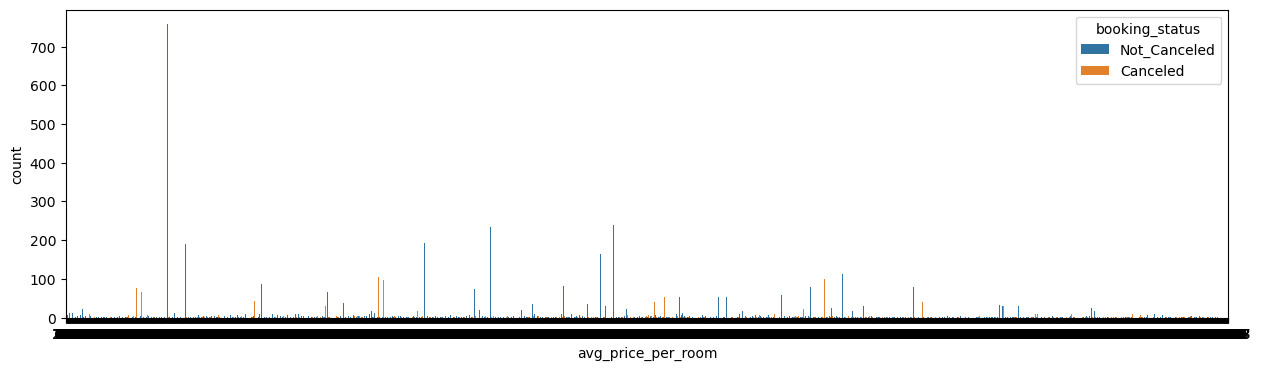

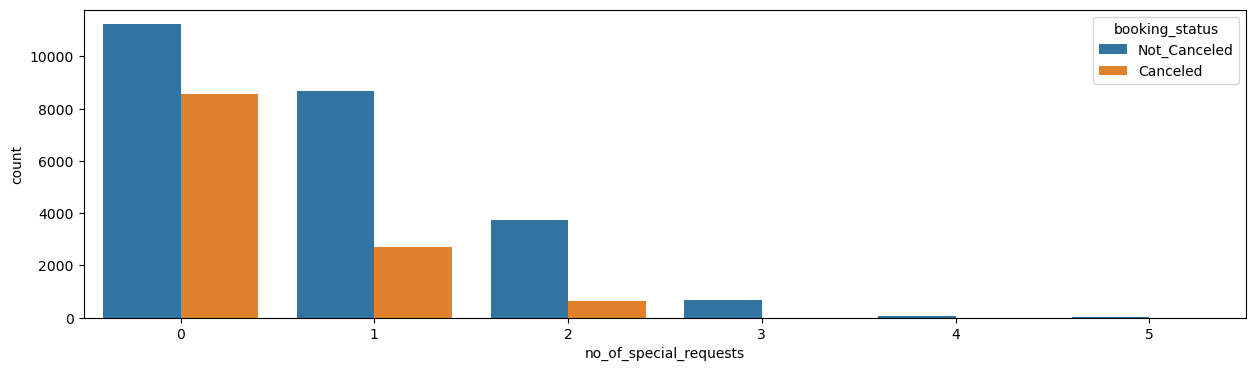

In [31]:
#data vasulization for numerical data

for i in num:
    fig = plt.figure(figsize = (15, 4))
    sns.countplot(data = df, x = i, hue = 'booking_status')
    plt.show()

#### Top contributors to the numerical features:
#### 'no_of_adults': 2
#### 'no_of_children': 0
#### 'no_of_weekend_nights': 0-2
#### 'no_of_week_nights': 1-4
#### 'no_of_previous_cancellations': 0
#### 'no_of_previous_bookings_not_canceled': 0
#### 'no_of_special_requests': 0-1

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

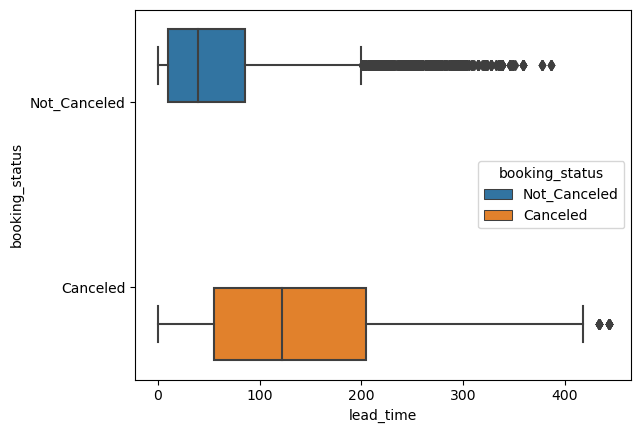

In [48]:
#boxplot for lead_time, avg_price_per_room

sns.boxplot(data = df, x = 'lead_time', y = 'booking_status', hue = 'booking_status')

<AxesSubplot:xlabel='avg_price_per_room', ylabel='booking_status'>

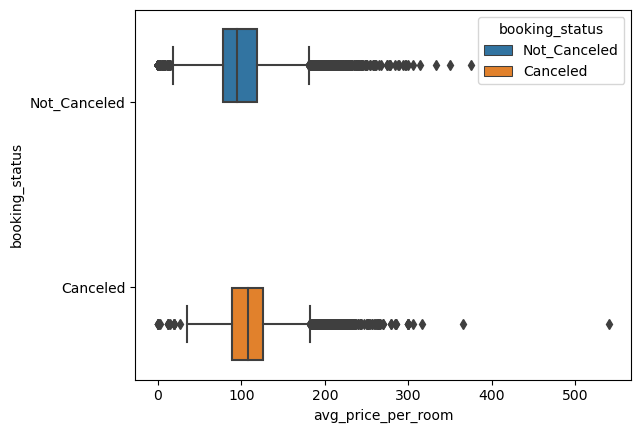

In [49]:
sns.boxplot(data = df, x = 'avg_price_per_room', y = 'booking_status', hue = 'booking_status')

## 2. Problem definition: ML model & metrics

## 3. Feature Engineering

In [73]:
df2 = df.copy()
df2['booking_status'] = df2['booking_status'].map(lambda x: 1 if x == 'Canceled' else 0)
df2.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [74]:
#divide into train and test

features = cat + num
target = 'booking_status'

X = df2[features]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2023)

In [92]:
#onehotencoder

ct = ColumnTransformer(transformers = [('std', StandardScaler(), num), 
                                     ('ohe', OneHotEncoder(), cat)],
                      verbose_feature_names_out = False)
ct.fit(X_train)

ColumnTransformer(transformers=[('std', StandardScaler(),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'lead_time', 'no_of_previous_cancellations',
                                  'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room',
                                  'no_of_special_requests']),
                                ('ohe', OneHotEncoder(),
                                 ['type_of_meal_plan',
                                  'required_car_parking_space',
                                  'room_type_reserved', 'season',
                                  'market_segment_type', 'repeated_guest'])],
                  verbose_feature_names_out=False)

In [94]:
X_train2 = pd.DataFrame(ct.fit_transform(X_train), columns = ct.get_feature_names_out())
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  float64
 1   no_of_children                        29020 non-null  float64
 2   no_of_weekend_nights                  29020 non-null  float64
 3   no_of_week_nights                     29020 non-null  float64
 4   lead_time                             29020 non-null  float64
 5   no_of_previous_cancellations          29020 non-null  float64
 6   no_of_previous_bookings_not_canceled  29020 non-null  float64
 7   avg_price_per_room                    29020 non-null  float64
 8   no_of_special_requests                29020 non-null  float64
 9   type_of_meal_plan_Meal Plan 1         29020 non-null  float64
 10  type_of_meal_plan_Meal Plan 2         29020 non-null  float64
 11  type_of_meal_pl

In [102]:
X_train2_num = X_train2.iloc[:, 0:9]
X_train2_cat = X_train2.iloc[:, 9:33]

In [104]:
#statistical test for categorical featues: chi2

chi = SelectKBest(score_func = chi2, k = 'all')
chi = chi.fit(X_train2_cat, y_train)

In [106]:
chi_p = chi.pvalues_
chi_p

array([3.67957366e-007, 2.02187553e-045, 7.44012074e-001, 6.00080625e-001,
       9.76323453e-003, 8.93987114e-047, 1.09582284e-001, 6.44835337e-001,
       7.44012074e-001, 7.33518838e-002, 5.26324844e-002, 3.76812712e-009,
       1.02523855e-002, 5.26417811e-001, 2.97539163e-002, 1.72867740e-060,
       1.24816826e-138, 6.73879426e-001, 2.39412379e-034, 6.25772335e-080,
       2.92946655e-008, 6.46690169e-028, 3.35699959e-003, 1.09581609e-072])

Text(0.5, 0, 'p_value')

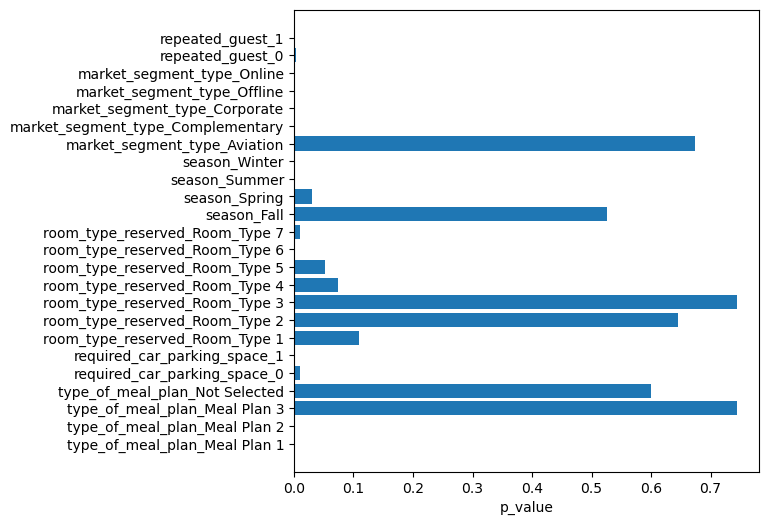

In [118]:
fig = plt.figure(figsize = (6, 6))
plt.barh(X_train2_cat.columns, chi_p)
plt.xlabel('p_value')

#reject categorical features (p>0.05), 15 features left

In [123]:
#let k = 15
chi = SelectKBest(score_func = chi2, k = 15)
chi = chi.fit(X_train2_cat, y_train)

In [125]:
fs_cat = chi.get_feature_names_out()
fs_cat

array(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'required_car_parking_space_0', 'required_car_parking_space_1',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'season_Spring', 'season_Summer', 'season_Winter',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'repeated_guest_0',
       'repeated_guest_1'], dtype=object)

In [128]:
#statistical test for numerical featues: f_classif

f = SelectKBest(score_func = f_classif, k = 'all')
f = f.fit(X_train2_num, y_train)

f_p = f.pvalues_
f_p

array([1.07795524e-055, 1.45004485e-008, 6.41227209e-026, 1.72510867e-053,
       0.00000000e+000, 9.41800304e-009, 8.59599024e-024, 4.35778257e-125,
       0.00000000e+000])

Text(0.5, 0, 'p_value')

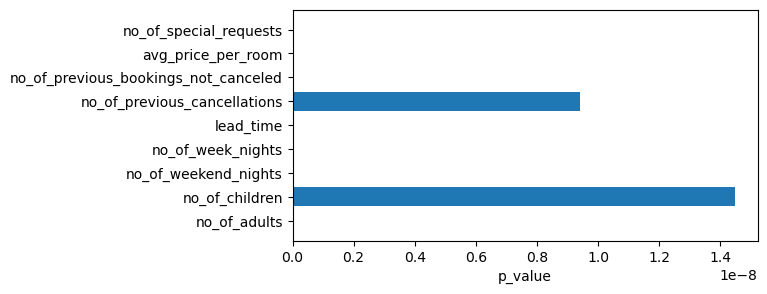

In [131]:
fig = plt.figure(figsize = (6, 3))
plt.barh(X_train2_num.columns, f_p)
plt.xlabel('p_value')

#reject numerical features (p>0.05): no

In [157]:
#do not drop any features
X_test2 = pd.DataFrame(ct.fit_transform(X_test), columns = ct.get_feature_names_out())

## 4. Modeling

In [158]:
#logistic regression

model = LogisticRegression(random_state = 2023, max_iter = 1000, class_weight = 'balanced', n_jobs = -1)
model.fit(X_train2, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=2023)

In [159]:
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

y_train_proba = model.predict_proba(X_train2)
y_test_proba = model.predict_proba(X_test2)

In [160]:
print('train roc_auc_score: ', roc_auc_score(y_train, y_train_proba[:, 1]))
print('test roc_auc_score: ', roc_auc_score(y_test, y_test_proba[:, 1]))

train roc_auc_score:  0.8624154388470873
test roc_auc_score:  0.8712708120994115


In [161]:
print('train ', classification_report(y_train, y_train_pred, labels = [0, 1]))
print('test ', classification_report(y_test, y_test_pred, labels = [0, 1]))

train                precision    recall  f1-score   support

           0       0.88      0.78      0.83     19543
           1       0.63      0.77      0.70      9477

    accuracy                           0.78     29020
   macro avg       0.76      0.78      0.76     29020
weighted avg       0.80      0.78      0.79     29020

test                precision    recall  f1-score   support

           0       0.88      0.79      0.83      4847
           1       0.65      0.78      0.71      2408

    accuracy                           0.79      7255
   macro avg       0.76      0.78      0.77      7255
weighted avg       0.80      0.79      0.79      7255



In [170]:
#hyperparameter tuning and cv
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023) 

model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=2023, max_iter=1000, class_weight='balanced')

C_range = [0.1, 1.0, 10]
l1_ratio_range = [0, 0.01, 0.033, 0.1, 0.33, 1]

grid = dict()
grid['C'] = C_range
grid['l1_ratio'] = l1_ratio_range

model = GridSearchCV(model, param_grid = grid, scoring = 'roc_auc', \
                      cv = skf, n_jobs = -1, error_score = np.NaN)
model = model.fit(X_train2, y_train)

model.best_params_

{'C': 10, 'l1_ratio': 1}

In [171]:
result = model.cv_results_
result

{'mean_fit_time': array([23.60628719, 31.45737453, 32.1665463 , 33.44708495, 37.82576199,
        13.41685495, 38.75278358, 50.97862635, 50.17919073, 47.21147385,
        47.26962938, 46.96498108, 37.7606185 , 51.03653793, 51.81528559,
        50.90572128, 41.08894768, 29.515552  ]),
 'std_fit_time': array([0.48242679, 0.92129066, 1.04083467, 0.63945218, 1.38233848,
        0.64928952, 1.70704346, 2.01354036, 1.47469439, 4.06942756,
        2.49793651, 0.56179714, 0.29392556, 0.1208313 , 0.67942536,
        0.77450447, 4.77293425, 1.74361298]),
 'mean_score_time': array([0.00573516, 0.01534033, 0.0100369 , 0.00341496, 0.01251316,
        0.01250148, 0.00968952, 0.00968657, 0.0053318 , 0.00999069,
        0.00313563, 0.01099253, 0.00633197, 0.00938253, 0.00625401,
        0.0093812 , 0.00486054, 0.01034989]),
 'std_score_time': array([0.00707038, 0.00179939, 0.00821254, 0.00586873, 0.0062566 ,
        0.00625074, 0.00645552, 0.00792846, 0.00668856, 0.00698259,
        0.00627127, 0.0093

In [172]:
#best model
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

y_train_proba = model.predict_proba(X_train2)
y_test_proba = model.predict_proba(X_test2)

In [173]:
print('train roc_auc_score: ', roc_auc_score(y_train, y_train_proba[:, 1]))
print('test roc_auc_score: ', roc_auc_score(y_test, y_test_proba[:, 1]))

train roc_auc_score:  0.8624274415028328
test roc_auc_score:  0.8713179351271843


In [174]:
print('train ', classification_report(y_train, y_train_pred, labels = [0, 1]))
print('test ', classification_report(y_test, y_test_pred, labels = [0, 1]))

train                precision    recall  f1-score   support

           0       0.88      0.78      0.83     19543
           1       0.63      0.77      0.70      9477

    accuracy                           0.78     29020
   macro avg       0.76      0.78      0.76     29020
weighted avg       0.80      0.78      0.78     29020

test                precision    recall  f1-score   support

           0       0.88      0.79      0.83      4847
           1       0.65      0.78      0.71      2408

    accuracy                           0.79      7255
   macro avg       0.76      0.78      0.77      7255
weighted avg       0.80      0.79      0.79      7255



In [ ]:
model = LogisticRegression(C=10, l1_ratio=1, 
                           penalty='elasticnet', solver='saga', random_state=2023, max_iter=1000, class_weight='balanced')
model.fit(X_train2, y_train)

In [177]:
coef = model.coef_
coef

array([[ 0.03987683,  0.07997679,  0.14985042,  0.04603914,  1.34631841,
         0.08503638, -0.07951584,  0.52997549, -1.17526603, -0.57947025,
        -0.52134258,  0.54758706, -0.32951018,  0.19826921, -1.37740943,
         0.35030973,  0.00380566,  0.        ,  0.15216835, -0.23846416,
        -0.45090333, -0.93699888, -0.04691399,  0.02398006, -0.06827688,
        -0.65315296,  1.181488  , -2.85566633,  0.16108452, -0.79175586,
         1.09052233,  0.56140448, -1.73604565]])

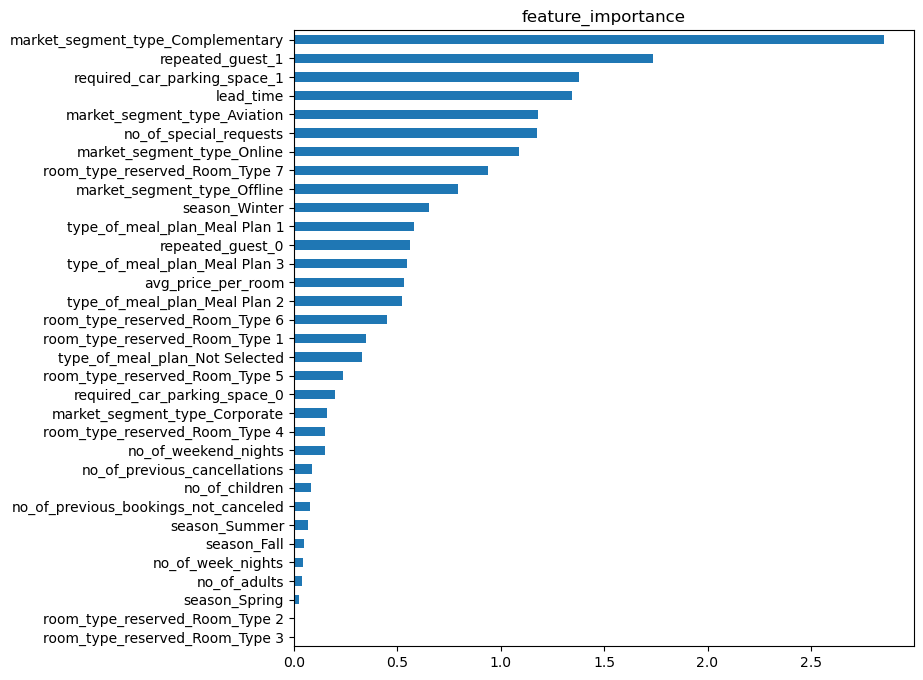

In [189]:
#feature importance
fig = plt.figure(figsize = (8, 8))
feature_importance = pd.Series(coef[0], index = X_train2.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [193]:
#random forest

model_rf = RandomForestClassifier(max_depth = 9,
                                        min_samples_leaf = 5,
                                        min_samples_split = 0.01)
model_rf = model_rf.fit(X_train2, y_train)

In [195]:
y_train_pred = model_rf.predict(X_train2)
y_test_pred = model_rf.predict(X_test2)

y_train_proba = model_rf.predict_proba(X_train2)
y_test_proba = model_rf.predict_proba(X_test2)

In [197]:
print('train roc_auc_score: ', roc_auc_score(y_train, y_train_proba[:, 1]))
print('test roc_auc_score: ', roc_auc_score(y_test, y_test_proba[:, 1]))

train roc_auc_score:  0.9060602024379905
test roc_auc_score:  0.9033046179881792


In [198]:
print('train ', classification_report(y_train, y_train_pred, labels = [0, 1]))
print('test ', classification_report(y_test, y_test_pred, labels = [0, 1]))

train                precision    recall  f1-score   support

           0       0.84      0.95      0.89     19543
           1       0.86      0.64      0.73      9477

    accuracy                           0.85     29020
   macro avg       0.85      0.79      0.81     29020
weighted avg       0.85      0.85      0.84     29020

test                precision    recall  f1-score   support

           0       0.84      0.94      0.89      4847
           1       0.85      0.64      0.73      2408

    accuracy                           0.84      7255
   macro avg       0.85      0.79      0.81      7255
weighted avg       0.84      0.84      0.84      7255



In [200]:
#hypterparameter tuning and cv
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100) 

model_rf = RandomForestClassifier(n_estimators=100, random_state=2023, class_weight='balanced', n_jobs=-1)

max_depths = [2, 5, 8]
min_samples_leaf = [2, 5, 8]
max_features = [0.25, 0.5, 0.8]

grid = dict()
grid['max_depth'] = max_depths
grid['min_samples_leaf'] = min_samples_leaf
grid['max_features'] = max_features 

model_rf = GridSearchCV(model_rf, param_grid = grid, scoring = 'roc_auc', \
                      cv = skf, n_jobs = -1, error_score = np.NaN)
model_rf = model_rf.fit(X_train2, y_train)
model_rf.best_params_

{'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 2}

In [205]:
result = model_rf.cv_results_
result

{'mean_fit_time': array([1.21885743, 2.98022017, 3.23417988, 2.0738451 , 3.39551458,
        4.51327052, 4.53212042, 3.6070848 , 5.14439487, 4.26663532,
        3.72062745, 3.75067716, 5.22805085, 6.20380087, 5.75073042,
        6.63769827, 8.04482107, 7.65471373, 4.91573434, 3.48984928,
        4.3424789 , 5.48781633, 3.91208439, 7.99018598, 8.75708652,
        6.5365612 , 8.0948638 ]),
 'std_fit_time': array([0.22204205, 0.30491158, 0.34326298, 0.72870302, 1.33729443,
        0.77914114, 1.03955715, 1.0819214 , 1.45596841, 1.74838292,
        0.18799703, 0.01484207, 0.52089343, 0.23235407, 0.20713004,
        1.27339932, 0.2728043 , 0.48029565, 1.74778127, 0.92262792,
        0.52003542, 0.48646611, 0.23333852, 0.1071163 , 0.35739314,
        1.16926708, 0.0976796 ]),
 'mean_score_time': array([2.34864068, 0.73506351, 0.50468946, 2.58805094, 2.18157306,
        1.00837002, 2.00766287, 2.79155636, 1.73504515, 1.75681901,
        1.25090399, 0.95201073, 2.61235671, 1.45815301, 1.915543

In [202]:
#best model
y_train_pred = model_rf.predict(X_train2)
y_test_pred = model_rf.predict(X_test2)

y_train_proba = model_rf.predict_proba(X_train2)
y_test_proba = model_rf.predict_proba(X_test2)

In [203]:
print('train roc_auc_score: ', roc_auc_score(y_train, y_train_proba[:, 1]))
print('test roc_auc_score: ', roc_auc_score(y_test, y_test_proba[:, 1]))

train roc_auc_score:  0.9377539519391959
test roc_auc_score:  0.9269740007690478


In [204]:
print('train ', classification_report(y_train, y_train_pred, labels = [0, 1]))
print('test ', classification_report(y_test, y_test_pred, labels = [0, 1]))

train                precision    recall  f1-score   support

           0       0.91      0.89      0.90     19543
           1       0.78      0.82      0.80      9477

    accuracy                           0.87     29020
   macro avg       0.85      0.86      0.85     29020
weighted avg       0.87      0.87      0.87     29020

test                precision    recall  f1-score   support

           0       0.90      0.88      0.89      4847
           1       0.77      0.81      0.79      2408

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.84      7255
weighted avg       0.86      0.86      0.86      7255



In [208]:
#best model
model_rf = RandomForestClassifier(max_depth=8, max_features=0.8, min_samples_leaf=2, 
                                  n_estimators=100, random_state=2023, 
                                  class_weight='balanced', n_jobs=-1)
model_rf.fit(X_train2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=0.8,
                       min_samples_leaf=2, n_jobs=-1, random_state=2023)

In [211]:
#feature importance
importance = model_rf.feature_importances_
importance

array([2.37348567e-02, 6.53317770e-04, 2.47776760e-02, 1.61325581e-02,
       4.35116342e-01, 2.55727347e-05, 5.64515022e-05, 1.07246404e-01,
       1.65467623e-01, 1.18652940e-03, 2.86096377e-03, 2.21744207e-18,
       1.14356389e-03, 3.04852698e-03, 8.71897059e-03, 1.22261331e-03,
       1.80537715e-04, 0.00000000e+00, 8.64153433e-04, 6.51269655e-04,
       1.32839782e-04, 2.42318347e-05, 7.25247706e-03, 3.89209088e-03,
       3.02522964e-03, 2.98487995e-02, 9.23793561e-04, 2.17413946e-05,
       2.36463792e-03, 2.72853824e-02, 1.31709021e-01, 1.27131895e-04,
       3.04692602e-04])

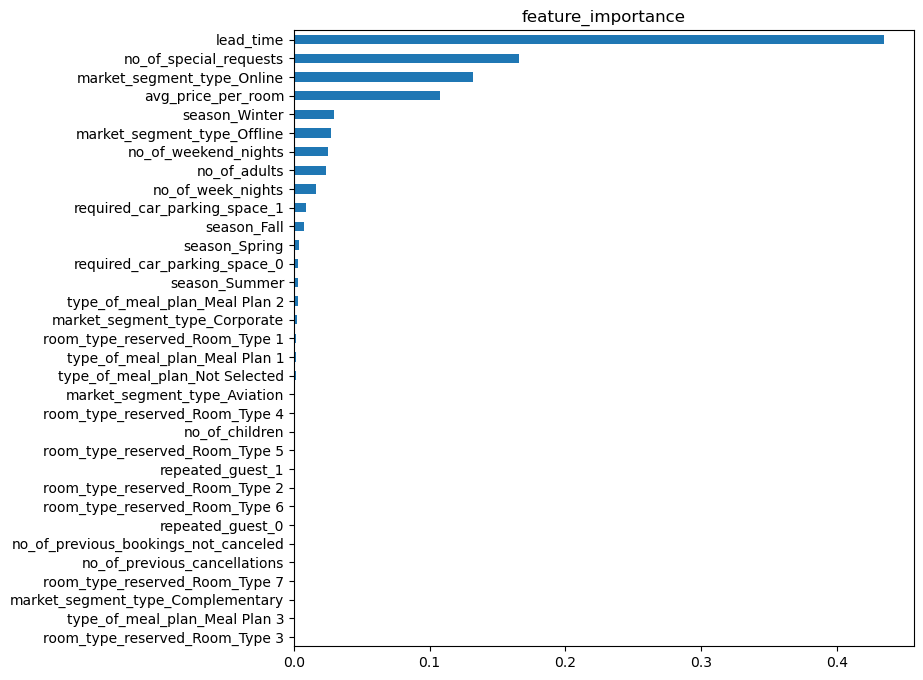

In [212]:
#feature importance
fig = plt.figure(figsize = (8, 8))
feature_importance = pd.Series(importance, index = X_train2.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()